In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the diabetes_data.csv.
import pandas as pd
diabetes_data_df = pd.read_csv('https://raw.githubusercontent.com/ComfyKoala/diabetes-classification/main/Stephen/diabetes_data.csv')
# Display the first few rows
diabetes_data_df.head()



,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,6000,44,0,1,2,1,32.985284,1,4.499365,2.443385,...,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1,Confidential
1,6001,51,1,0,1,2,39.916764,0,1.578919,8.301264,...,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1,Confidential
2,6002,89,1,0,1,3,19.782251,0,1.177301,6.103395,...,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0,Confidential
3,6003,21,1,1,1,2,32.376881,1,1.714621,8.645465,...,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0,Confidential
4,6004,27,1,0,1,3,16.808600,0,15.462549,4.629383,...,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0,Confidential


In [2]:
# List of all the columns in the data set
print(diabetes_data_df.columns)

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryDiabetes', 'GestationalDiabetes',
       'PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension',
       'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c',
       'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL',
       'CholesterolHDL', 'CholesterolTriglycerides',
       'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications',
       'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss',
       'FatigueLevels', 'BlurredVision', 'SlowHealingSores',
       'TinglingHandsFeet', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
       'Diagnosis', 'DoctorInCharge'],
      dtype='object')


## Drop Non-Beneficial Columns

In [3]:
# Drop the non-beneficial ID columns, 'PatientID' and 'DoctorInCharge'.
diabetes_data_clean_df = diabetes_data_df.drop(columns=['PatientID', 'DoctorInCharge'])

In [4]:
diabetes_data_clean_df

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,44,0,1,2,1,32.985284,1,4.499365,2.443385,4.898831,...,0,1,73.765109,0,0,0,1.782724,4.486980,7.211349,1
1,51,1,0,1,2,39.916764,0,1.578919,8.301264,8.941093,...,0,0,91.445753,0,0,1,3.381070,5.961705,5.024612,1
2,89,1,0,1,3,19.782251,0,1.177301,6.103395,7.722543,...,0,0,54.485744,0,0,0,2.701019,8.950821,7.034944,0
3,21,1,1,1,2,32.376881,1,1.714621,8.645465,4.804044,...,0,0,77.866758,0,0,1,1.409056,3.124769,4.717774,0
4,27,1,0,1,3,16.808600,0,15.462549,4.629383,2.532756,...,0,0,37.731808,0,0,0,1.218452,6.977741,7.887940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1874,37,0,0,2,2,20.811137,0,10.946207,3.217636,8.338196,...,0,1,88.122729,0,0,1,3.154225,3.849584,8.805087,0
1875,80,1,0,2,2,27.694312,0,16.067905,7.107335,3.034771,...,1,0,77.128599,0,0,1,0.424893,5.217465,0.915878,1
1876,38,1,0,0,2,35.640824,0,4.865124,9.881212,2.657002,...,0,0,13.148221,0,0,0,0.553757,3.377744,3.017481,1
1877,43,0,1,2,0,32.423016,0,6.362936,4.750079,8.736024,...,0,0,54.370980,0,0,0,1.132470,0.009250,4.914556,1


In [5]:
print(diabetes_data_clean_df.nunique())

Age                                71
Gender                              2
Ethnicity                           4
SocioeconomicStatus                 3
EducationLevel                      4
BMI                              1879
Smoking                             2
AlcoholConsumption               1879
PhysicalActivity                 1879
DietQuality                      1879
SleepQuality                     1879
FamilyHistoryDiabetes               2
GestationalDiabetes                 2
PolycysticOvarySyndrome             2
PreviousPreDiabetes                 2
Hypertension                        2
SystolicBP                         90
DiastolicBP                        60
FastingBloodSugar                1879
HbA1c                            1879
SerumCreatinine                  1879
BUNLevels                        1879
CholesterolTotal                 1879
CholesterolLDL                   1879
CholesterolHDL                   1879
CholesterolTriglycerides         1879
Antihyperten

## Identify Target (y) and Features (X)

In [6]:
# Split our preprocessed data into our features and target arrays
y = diabetes_data_clean_df["Diagnosis"]
X = diabetes_data_clean_df.drop(columns="Diagnosis")

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=10,
                                                    stratify=y)
X_train.shape

(1409, 43)

In [7]:
print(X_train.dtypes)

Age                                int64
Gender                             int64
Ethnicity                          int64
SocioeconomicStatus                int64
EducationLevel                     int64
BMI                              float64
Smoking                            int64
AlcoholConsumption               float64
PhysicalActivity                 float64
DietQuality                      float64
SleepQuality                     float64
FamilyHistoryDiabetes              int64
GestationalDiabetes                int64
PolycysticOvarySyndrome            int64
PreviousPreDiabetes                int64
Hypertension                       int64
SystolicBP                         int64
DiastolicBP                        int64
FastingBloodSugar                float64
HbA1c                            float64
SerumCreatinine                  float64
BUNLevels                        float64
CholesterolTotal                 float64
CholesterolLDL                   float64
CholesterolHDL  

## StandardScaler

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Neural Network #1

In [9]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
n_features = X_train.shape[1]

nn = tf.keras.models.Sequential()

# First hidden layer with dropout
nn.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=n_features))
nn.add(tf.keras.layers.Dropout(0.2))  # Adding a dropout layer with 20% dropout rate

# Second hidden layer with dropout
nn.add(tf.keras.layers.Dense(units=3, activation="sigmoid"))
nn.add(tf.keras.layers.Dropout(0.2))  # Another dropout layer

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              21 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compile the model
nn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
# Create a callback that saves the model's weights every five epochs.
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='model_weights_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq=5 * (len(X_train_scaled) // 32)  # Save every 5 epochs (assuming batch size = 32)
)



In [12]:
# Early stopping callback
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Can also use 'val_accuracy'
    patience=10,         # Wait for 10 epochs without improvement
    restore_best_weights=True
)

# Train the model with validation split and callbacks
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                   validation_split=0.2, callbacks=[checkpoint_callback, early_stopping_callback])


Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.4610 - loss: 0.7186 - val_accuracy: 0.4504 - val_loss: 0.6982
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5076 - loss: 0.6958 - val_accuracy: 0.4929 - val_loss: 0.6875
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5051 - loss: 0.6931 - val_accuracy: 0.5390 - val_loss: 0.6799
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5507 - loss: 0.6826 - val_accuracy: 0.6135 - val_loss: 0.6733
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6076 - loss: 0.6715 - val_accuracy: 0.6206 - val_loss: 0.6672
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5891 - loss: 0.6697 - val_accuracy: 0.6277 - val_loss: 0.6612
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6137 - loss: 0.6691 - val_accuracy: 0.6206 - val_loss: 0.6560
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5891 - loss: 0.6638 - val_accuracy: 0.6

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

15/15 - 0s - 3ms/step - accuracy: 0.8085 - loss: 0.4048
Loss: 0.4048275351524353, Accuracy: 0.8085106611251831


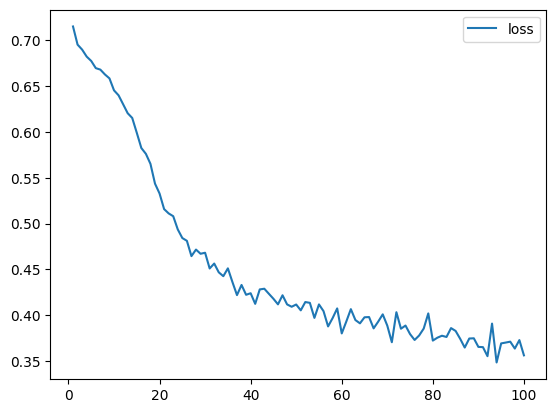

In [14]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

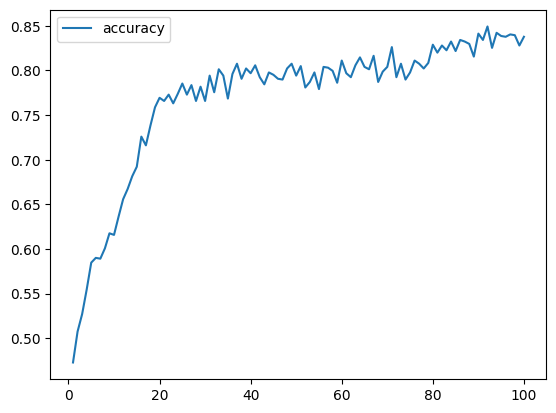

In [15]:
history_df.plot(y="accuracy")
plt.show()

# Weakest and Strongest Features

In [16]:
!pip install scikeras scikit-learn

In [17]:
!pip install --upgrade scipy scikit-learn scikeras

In [18]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import numpy as np

# Ensure that nn is defined as your Keras model

# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in ascending order (weakest to strongest)
sorted_indices = np.argsort(importances)

# Get the top 20 weakest features
top_20_weakest_indices = sorted_indices[:20]
top_20_weakest_features = X_test_scaled.columns[top_20_weakest_indices]
top_20_weakest_importances = importances[top_20_weakest_indices]

# Display the weakest features and their importances
for feature, importance in zip(top_20_weakest_features, top_20_weakest_importances):
    print(f"Weakest feature: {feature} with importance {importance}")




Weakest feature: Statins with importance -0.00957446808510638
Weakest feature: WaterQuality with importance -0.005957446808510613
Weakest feature: Smoking with importance -0.00574468085106381
Weakest feature: MedicalCheckupsFrequency with importance -0.005531914893617007
Weakest feature: BUNLevels with importance -0.004680851063829772
Weakest feature: DietQuality with importance -0.004680851063829772
Weakest feature: Ethnicity with importance -0.004042553191489351
Weakest feature: CholesterolLDL with importance -0.003617021276595733
Weakest feature: Gender with importance -0.0036170212765957222
Weakest feature: AntihypertensiveMedications with importance -0.003404255319148919
Weakest feature: SlowHealingSores with importance -0.0034042553191488967
Weakest feature: SleepQuality with importance -0.0029787234042553123
Weakest feature: EducationLevel with importance -0.002765957446808487
Weakest feature: Age with importance -0.002765957446808476
Weakest feature: CholesterolTriglycerides wi

In [19]:
# Define the wrapped model (assuming nn is your Keras Sequential model)
wrapped_nn = KerasClassifier(model=nn, epochs=20, batch_size=32, verbose=0)

# Train the wrapped model
wrapped_nn.fit(X_train_scaled, y_train)

# Compute permutation importance
result = permutation_importance(wrapped_nn, X_test_scaled, y_test, n_repeats=10, random_state=10)

# Get feature importances
importances = result.importances_mean

# Ensure X_test_scaled is a DataFrame or convert it
if not isinstance(X_test_scaled, pd.DataFrame):
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Sort the features by importance in descending order (strongest to weakest)
sorted_indices = np.argsort(importances)[::-1]

# Get the top 20 strongest features
top_20_strongest_indices = sorted_indices[:20]
top_20_strongest_features = X_test_scaled.columns[top_20_strongest_indices]
top_20_strongest_importances = importances[top_20_strongest_indices]

# Display the strongest features and their importances
for feature, importance in zip(top_20_strongest_features, top_20_strongest_importances):
    print(f"Strongest feature: {feature} with importance {importance}")

Strongest feature: FastingBloodSugar with importance 0.18872340425531914
Strongest feature: HbA1c with importance 0.1695744680851064
Strongest feature: FrequentUrination with importance 0.0329787234042553
Strongest feature: Hypertension with importance 0.020425531914893613
Strongest feature: UnexplainedWeightLoss with importance 0.011063829787234025
Strongest feature: TinglingHandsFeet with importance 0.009148936170212752
Strongest feature: ExcessiveThirst with importance 0.00914893617021274
Strongest feature: DiastolicBP with importance 0.008085106382978723
Strongest feature: SystolicBP with importance 0.006595744680851024
Strongest feature: FamilyHistoryDiabetes with importance 0.00638297872340422
Strongest feature: BMI with importance 0.005957446808510625
Strongest feature: GestationalDiabetes with importance 0.005531914893617007
Strongest feature: QualityOfLifeScore with importance 0.005531914893616996
Strongest feature: MedicationAdherence with importance 0.004468085106382957
Stro